<a href="https://colab.research.google.com/github/visualcomments/ru_philosophy/blob/master/philosophy_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практикум по философии


Материалы для семинарской работы - это философские тексты. Вам предлагается использовать современные инструменты для работы с текстами из области естественной обработки языка. Цель - научиться работать с философскими понятиями путем составления корректных и точных запросов.

Для работы вам предоставлена модель [fasttext](https://radimrehurek.com/gensim/models/fasttext.html), которая была обучена на 346 философских текстах на русском языке. Ваша задача - научиться формулировать 
запросы на естественном языке для того, чтобы получить нужный результат.




## 1. Загружаем данные

In [ ]:
!gdown --id 1edszqEq2baT3gJ-c5zEj5gEzZ2lQ3cx5

Downloading...
From: https://drive.google.com/uc?id=1edszqEq2baT3gJ-c5zEj5gEzZ2lQ3cx5
To: /content/ft_model.zip
1.03GB [00:18, 56.3MB/s]


In [ ]:
!unzip /content/ft_model.zip

Archive:  /content/ft_model.zip
  inflating: ft_model.model          
  inflating: ft_model.model.trainables.syn1neg.npy  
  inflating: ft_model.model.trainables.vectors_ngrams_lockf.npy  
  inflating: ft_model.model.trainables.vectors_vocab_lockf.npy  
  inflating: ft_model.model.wv.vectors.npy  
  inflating: ft_model.model.wv.vectors_ngrams.npy  
  inflating: ft_model.model.wv.vectors_vocab.npy  


In [ ]:
from gensim.models.fasttext import FastText
import gensim

In [ ]:
ft_model = FastText.load('ft_model.model')

## 2. Поиск похожих слов

Мы можем уточнить, есть ли нужное нам слово в словаре.

In [ ]:
print('деньги' in ft_model.wv.vocab)

True


И получить численное представление нужного нам слова в виде его векторов.

In [ ]:
print(ft_model.wv['деньги'])

[ 0.5471626  -0.41622362 -0.5485975   0.5491371   0.95947444  0.926114
 -0.42660558 -0.28305227  0.16086881 -0.5062066   0.07815733 -0.1758449
  0.57530993 -0.18380529 -0.05137675  0.22902752  0.82067716 -0.13949652
  0.16195759 -0.80249137 -0.31149957 -0.39221847  0.01485958  0.27246755
  0.1292438   0.31765637  0.70530015  0.66605455 -0.42336375 -0.12579021
  0.13288297 -0.5621257  -0.49176368  0.4463184   0.16122995  0.6377801
  0.1649777  -0.41622183  0.30146503 -0.09674767  0.07200507  0.17904882
  0.10681664 -1.020983   -0.3700713   0.10315195  0.13164724 -0.91539365
 -0.2965587   0.4692946  -0.24157028  0.05219951  0.38393536  0.32045278
 -0.2234671   0.24565183 -0.03568505  0.41398183 -0.2365225   1.0014439
 -0.3427489  -0.09423564 -0.28765416 -0.40866214 -0.04704674 -0.2738601
 -0.1717455   0.22434483 -0.03978904 -0.47631967 -0.18655726 -0.36791748
 -0.58674693  0.24970411 -0.0668477  -0.05174331 -0.4580462  -0.11691961
 -0.3609827   0.10119683  0.13759428 -0.2181144  -0.22456

Если в словаре нет нужного нам слова, то поиск будет по n-граммам, если они есть в словаре.

In [ ]:
print('постбытие' in ft_model.wv.vocab)

False


In [ ]:
print('пос' in ft_model.wv.vocab)

True


Для поиска наиболее похожих слов может быть использовано одно или несколько слов. Префикс "positive=" указывает на положительные примеры для поиска, а "negative=" указывает на отрицательные.

In [ ]:
ft_model.wv.most_similar(positive=['бытие'], topn=20)

[('наличное', 0.89949631690979),
 ('себебытие', 0.8982352018356323),
 ('пебытие', 0.8948809504508972),
 ('себябытие', 0.8865840435028076),
 ('небытие', 0.8855091333389282),
 ('прабытие', 0.882461428642273),
 ('самобытие', 0.8770725131034851),
 ('seynбытие', 0.8695223331451416),
 ('неабсолютное', 0.869067907333374),
 ('абсолютное', 0.8681224584579468),
 ('инобытие', 0.8632370829582214),
 ('себясущее', 0.8559380769729614),
 ('нерефлектированное', 0.8533519506454468),
 ('бытиедля', 0.8531585931777954),
 ('самосущее', 0.8437557220458984),
 ('рефлектироваиное', 0.839028537273407),
 ('рефлектированное', 0.8372132182121277),
 ('самотождественное', 0.836571455001831),
 ('сущее', 0.8358814716339111),
 ('вотбытие', 0.8337213397026062)]

Можно сравнить два слова на взаимное сходство:

In [ ]:
ft_model.wv.similarity("бытие", 'время')

0.53715116

То же самое можно сделать с разными наборами слов.

In [ ]:
ft_model.wv.n_similarity(['парменид', 'бытие'], ['демокрит', 'небытие'])

0.8642444

Также можно выбрать слово, которое менее всего похоже на представленные в перечне слова:


In [ ]:
ft_model.wv.doesnt_match(["бытие", 'время', 'деньги'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'деньги'

Настройка поиска по положительным и отрицательным запросам дает более точный результат:

In [ ]:
ft_model.wv.most_similar(positive=['время', 'деньги'], negative=["бытие"], topn=20)

[('зарабаты', 0.7386071681976318),
 ('обеды', 0.706204891204834),
 ('поденщики', 0.6989943981170654),
 ('платежу', 0.6838440895080566),
 ('батраки', 0.6816064119338989),
 ('выезды', 0.6793645620346069),
 ('билеты', 0.6780691742897034),
 ('платя', 0.6751702427864075),
 ('платежи', 0.6746121048927307),
 ('оплатят', 0.6693703532218933),
 ('платежа', 0.6659442186355591),
 ('зарабатывал', 0.6630825400352478),
 ('заработали', 0.6558319330215454),
 ('арендаторы', 0.6551381349563599),
 ('зараба', 0.6537178158760071),
 ('долги', 0.6536828279495239),
 ('откупщики', 0.6524795293807983),
 ('платят', 0.6514546275138855),
 ('отбирал', 0.6480993032455444),
 ('кредиторы', 0.6478416323661804)]

Также мы можем посмотреть на векторные представления слов в двумерной плоскости. Визуализация помогает найти семантические кластеры и оценить их сходство и различие.

Далее код в версии Алексея Морозова, большое ему спасибо!

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from prettytable import PrettyTable
%matplotlib inline

In [ ]:
def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=4000, random_state=42)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=colors[classes[i]].reshape(1,-1), alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
        
    plt.grid(True)
    plt.savefig('embedding.png', dpi=300)
    plt.show()

In [ ]:
labels = []
tokens = []
classes = []

words = ['вольтер', 'монтескье', 'руссо', 'купер', 'кант', 'юм', 'гоббс', 'шеллинг', 'дарвин', 
         'гегель', 'фейербах', 'шопенгауэр', 'спиноза', 'локк', 'лейбниц', 'беркли', 
         'маркс', 'энгельс', 'ленин', 'дугин']
                   
words.sort()

samples = len(words)
for i, word in enumerate(words):
    tokens.append(ft_model.wv[word])
    labels.append(word.upper())
    classes.append(i)
    for similar_word, similarity in ft_model.wv.most_similar(word, topn=10):
        tokens.append(ft_model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i)

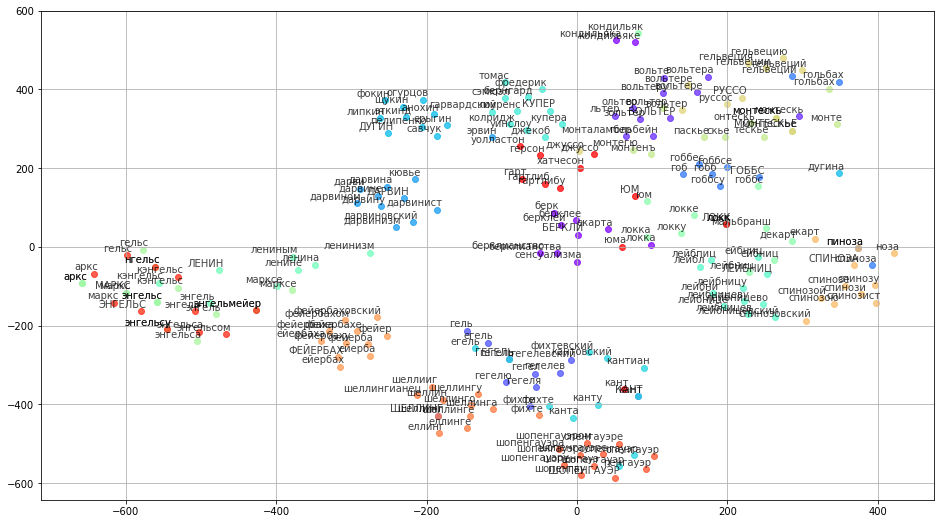

In [ ]:
tsne_plot(labels, tokens, classes, samples)

In [ ]:
dct_names = dict.fromkeys(words)
for key in dct_names.keys():
    dct_names[key] = dict.fromkeys(words);

for key1 in dct_names.keys():
    for key2 in dct_names[key1].keys():
        if key1 == key2:
            dct_names[key1][key2] = '-';
        else:
            dct_names[key1][key2] = ft_model.wv.similarity(key1, key2)

In [ ]:
x = PrettyTable()
x.field_names = [' ', *words]
for word in words:
    x.add_row([word, *dct_names[word].values()])
print(x)

+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|            |   беркли   |  вольтер   |   гегель   |   гоббс    |   дарвин   |   дугин    |    кант    |   купер    |  лейбниц   |   ленин    |    локк    |   маркс    | монтескье  |   руссо    |  спиноза   |  фейербах  |  шеллинг   | шопенгауэр |  энгельс   |     юм     |
+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|   беркли   |     -      | 0.59622717 | 0.5259542  | 0.59599805 | 0.4475111  | 0.37065804 | 0.6207692  | 0.5574172  | 0.6171965  | 0.51897275 | 0.7003579  | 0.55232644 | 0.52

Таблицу можно использовать как матрицу смежности и построить на её основе граф, то есть взять за вершины нужные нам слова, а коэффициенты сходства сделать весами рёбер. Пример, когда ребро добавляется, если сходство между вершинами больше 0,7:

In [ ]:
import networkx as nx

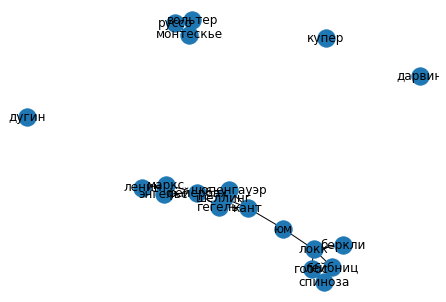

<Figure size 1800x1152 with 0 Axes>

In [ ]:
G = nx.Graph()
G.add_nodes_from(words)

for key1 in dct_names.keys():
    for key2 in dct_names[key1].keys():
        if key1 != key2:
            if dct_names[key1][key2] > 0.7:
                G.add_weighted_edges_from([(key1, key2, dct_names[key1][key2])])

nx.draw_spring(G, with_labels=True)
#nx.draw_shell(G, with_labels=True)
plt.figure(figsize=(25, 16));
plt.show();

In [ ]:
dct_vls = dict.fromkeys(words)
for key in dct_vls.keys():
    dct_vls[key] = dict.fromkeys(words)

for key1 in dct_vls.keys():
    for key2 in dct_vls[key1].keys():
        if key1 == key2:
            dct_vls[key1][key2] = '-';
        else:
            dct_vls[key1][key2] = ft_model.wv.rank(key1, key2)

In [ ]:
x = PrettyTable()
x.field_names = [' ', *words]
for word in words:
    x.add_row([word, *dct_vls[word].values()])
print(x)

+------------+--------+---------+--------+-------+--------+-------+-------+-------+---------+-------+--------+-------+-----------+--------+---------+----------+---------+------------+---------+-------+
|            | беркли | вольтер | гегель | гоббс | дарвин | дугин |  кант | купер | лейбниц | ленин |  локк  | маркс | монтескье | руссо  | спиноза | фейербах | шеллинг | шопенгауэр | энгельс |   юм  |
+------------+--------+---------+--------+-------+--------+-------+-------+-------+---------+-------+--------+-------+-----------+--------+---------+----------+---------+------------+---------+-------+
|   беркли   |   -    |   1024  |  3830  |  1031 | 11164  | 27778 |  561  |  2226 |   613   |  4266 |   68   |  2431 |    3755   |  6421  |   641   |   1141   |   2619  |    2684    |   4320  |  546  |
|  вольтер   |  2575  |    -    | 12033  |  213  |  4310  | 24370 |  4300 |  3351 |   2319  |  5934 |  1204  |  2010 |     12    |   50   |   407   |   1076   |   9874  |    4837    |   1748  

Также для ранжирования вершин можно выбрать метрику, когда ранг расстояния определяется от слова 1 до слова 2 по отношению к расстояниям всех слов от слова 1. То есть веса для второй метрики определяются по формуле: 1/rank. Ведь чем больше rank, тем хуже сходство. Рассмотрим пример с rank < 100.

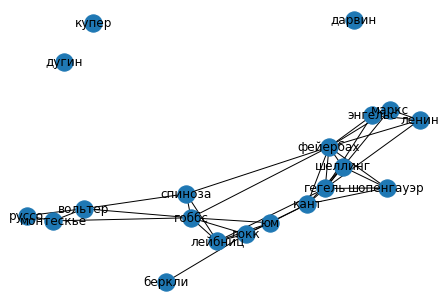

<Figure size 1800x1152 with 0 Axes>

In [ ]:
G = nx.Graph()
G.add_nodes_from(words)

for key1 in dct_vls.keys():
    for key2 in dct_vls[key1].keys():
        if key1 != key2:
            if dct_vls[key1][key2] < 100:
                G.add_weighted_edges_from([(key1, key2, 1/dct_vls[key1][key2])])

nx.draw_spring(G, with_labels=True)
#nx.draw_shell(G, with_labels=True)
plt.figure(figsize=(25, 16));
plt.show();

In [ ]:
sum_score = dict.fromkeys(words)
sum_rank = dict.fromkeys(words)

for key1 in dct_names.keys():
    s = 0
    for key2 in dct_names[key1].keys():
        if key1 != key2:
            s += dct_names[key1][key2]
    sum_score[key1] = s

for key1 in dct_vls.keys():
    s = 0
    for key2 in dct_vls[key1].keys():
        if key1 != key2:
            s += dct_vls[key1][key2]
    sum_rank[key1] = s
    
print(sum_rank)
print(sum_score)

{'беркли': 77119, 'вольтер': 83295, 'гегель': 62535, 'гоббс': 43862, 'дарвин': 105747, 'дугин': 1195252, 'кант': 50769, 'купер': 367275, 'лейбниц': 61126, 'ленин': 90320, 'локк': 59959, 'маркс': 42969, 'монтескье': 96254, 'руссо': 180555, 'спиноза': 54252, 'фейербах': 32431, 'шеллинг': 65559, 'шопенгауэр': 58309, 'энгельс': 43421, 'юм': 44728}
{'беркли': 10.563960522413254, 'вольтер': 11.394036710262299, 'гегель': 11.03827366232872, 'гоббс': 11.31650048494339, 'дарвин': 9.302361607551575, 'дугин': 7.421666815876961, 'кант': 11.42921057343483, 'купер': 9.75274869799614, 'лейбниц': 10.684063225984573, 'ленин': 10.36930537223816, 'локк': 10.826339930295944, 'маркс': 11.530200749635696, 'монтескье': 10.736812055110931, 'руссо': 9.722701862454414, 'спиноза': 11.00954419374466, 'фейербах': 11.805566906929016, 'шеллинг': 10.934004992246628, 'шопенгауэр': 10.96694901585579, 'энгельс': 11.232849925756454, 'юм': 10.839239716529846}


In [ ]:
list_score = list(sum_score.items())
list_score.sort(key=lambda i: i[1], reverse=True)

list_rank = list(sum_rank.items())
list_rank.sort(key=lambda i: i[1])

for i in range(len(list_rank)):
    print(list_rank[i], list_score[i])

('фейербах', 32431) ('фейербах', 11.805566906929016)
('маркс', 42969) ('маркс', 11.530200749635696)
('энгельс', 43421) ('кант', 11.42921057343483)
('гоббс', 43862) ('вольтер', 11.394036710262299)
('юм', 44728) ('гоббс', 11.31650048494339)
('кант', 50769) ('энгельс', 11.232849925756454)
('спиноза', 54252) ('гегель', 11.03827366232872)
('шопенгауэр', 58309) ('спиноза', 11.00954419374466)
('локк', 59959) ('шопенгауэр', 10.96694901585579)
('лейбниц', 61126) ('шеллинг', 10.934004992246628)
('гегель', 62535) ('юм', 10.839239716529846)
('шеллинг', 65559) ('локк', 10.826339930295944)
('беркли', 77119) ('монтескье', 10.736812055110931)
('вольтер', 83295) ('лейбниц', 10.684063225984573)
('ленин', 90320) ('беркли', 10.563960522413254)
('монтескье', 96254) ('ленин', 10.36930537223816)
('дарвин', 105747) ('купер', 9.75274869799614)
('руссо', 180555) ('руссо', 9.722701862454414)
('купер', 367275) ('дарвин', 9.302361607551575)
('дугин', 1195252) ('дугин', 7.421666815876961)


Для ранжирования вершин в графе можно воспользоваться пейджранком.

In [ ]:
import pandas as pd

In [ ]:
def pr_summary(G):
    pr = nx.pagerank(G)
    df = pd.DataFrame.from_dict({
        'tag': list(pr.keys()),
        'centrality_pr': list(pr.values())
    })
    return df.sort_values('centrality_pr', ascending=False)

In [ ]:
pr = pd.DataFrame(pr_summary(G), columns=['tag', 'centrality_pr'])

In [ ]:
pr.head()

,tag,centrality_pr
19,юм,0.120499
6,кант,0.120421
10,локк,0.113404
2,гегель,0.095828
11,маркс,0.074619


Если мы хотим посмотреть, на какие группы можно разделить выбранные слова, применяются алгоритмы модульности, которые "разбивают" граф на связные компоненты-модули. Попробуем часто примеянемые для этих целей алгоритмы Лувена и Гирван-Ньюмена.

Пример с Лувенским алгоритмом:

In [ ]:
!pip install python-louvain

In [ ]:
from community import community_louvain
communities =community_louvain.best_partition(G)

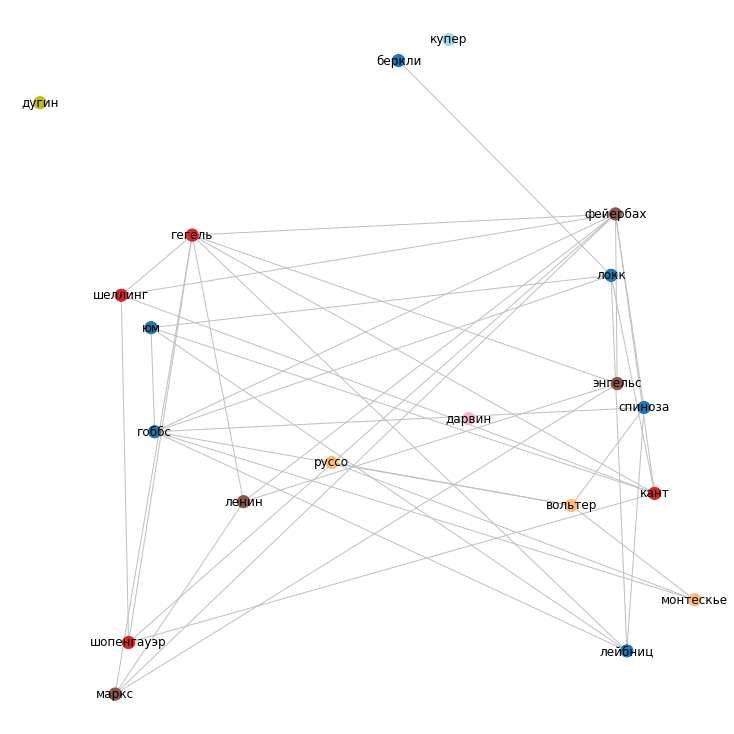

In [ ]:
pos = nx.random_layout(G, seed=23)

community_id = [communities[node] for node in G.nodes()]

fig = plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    edge_color=['silver'] * len(G.edges()),
    cmap=plt.cm.tab20,
    node_color=community_id,
    node_size=150,
)

Пример с алгоритмом Гирван-Ньюмена:

In [ ]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [ ]:
def girvan_newman(graph):
	
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
c = girvan_newman(G.copy())


node_groups = []

for i in c:
    node_groups.append(list(i))

In [ ]:
node_groups

[['фейербах',
  'ленин',
  'спиноза',
  'локк',
  'энгельс',
  'лейбниц',
  'кант',
  'гоббс',
  'шеллинг',
  'монтескье',
  'юм',
  'шопенгауэр',
  'руссо',
  'гегель',
  'вольтер',
  'маркс',
  'беркли'],
 ['дарвин'],
 ['дугин'],
 ['купер']]

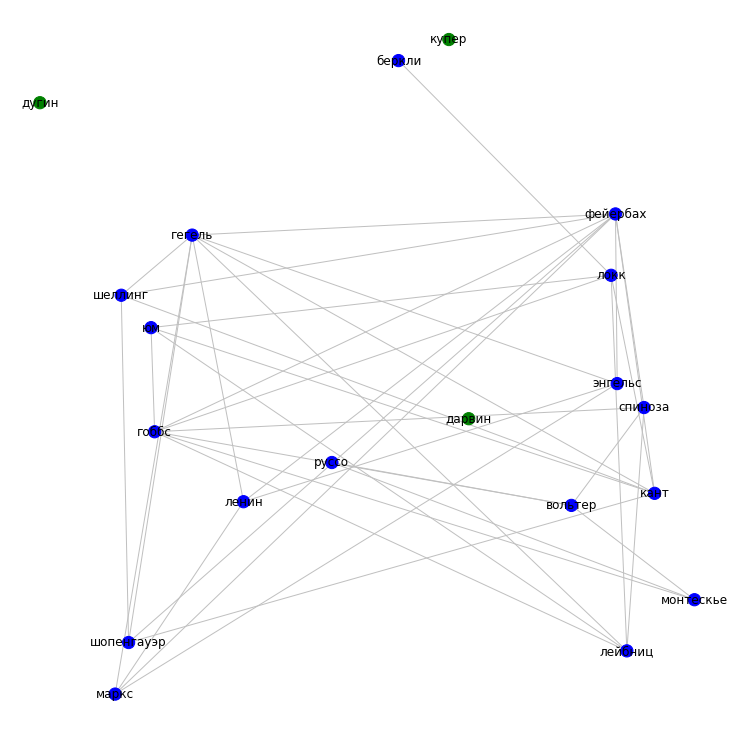

In [ ]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

pos = nx.random_layout(G, seed=23)

fig = plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=color_map,
    edge_color=['silver'] * len(G.edges()),
    cmap=plt.cm.tab20,    
    node_size=150,
)

# Пример: время, деньги и фасттекст (и при чем здесь бытие)

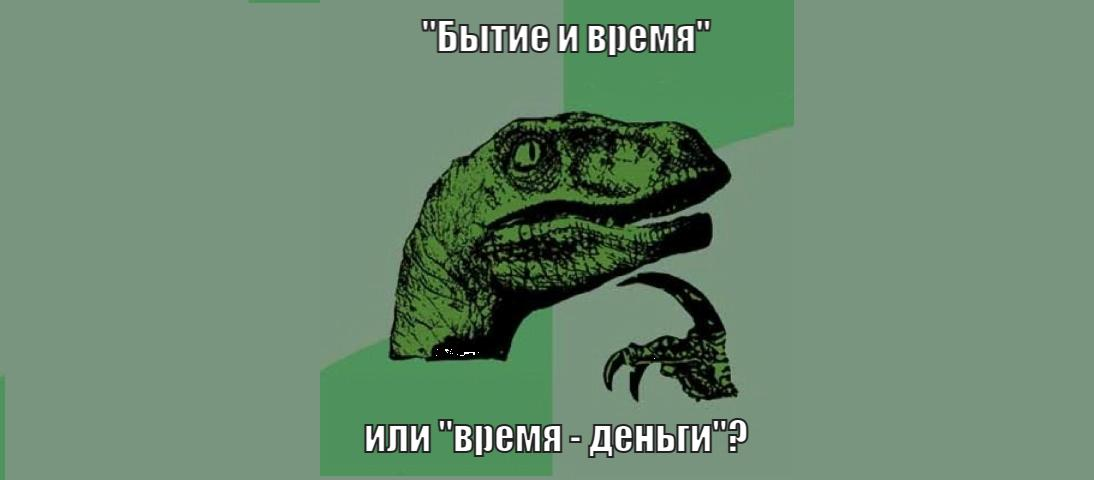

Все знают изречение «время — деньги». Но если обратиться к корпусу философских текстов, то такое сочетание для философии не самое привычное. Гораздо чаще время у философов ассоциируется, например, с бытием. Есть даже такая книга, «Бытие и время». Но вдруг нас заинтересует, как же всё-таки время и деньги связаны в философии? Самое время обратиться к глубокому обучению.

У нас есть модель фасттекста, которую обучили на корпусе из 346 философских книг на русском языке. Попробуем задать ей вопрос о сходстве денег и времени в философии. Но заодно захватим и связку «бытие - время»

Начнём с прояснения вопроса о взаимном сходстве двух пар понятий:

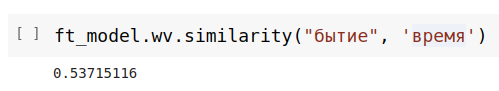

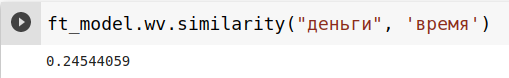

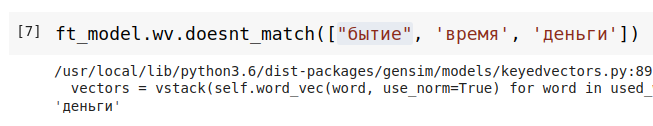

Деньги явно проигрывают бытию. Но поскольку мы задали вопрос о связи денег и времени в философии, пойдем дальше и представим бытие как негативный пример для поиска, а деньги и время — как позитивный.

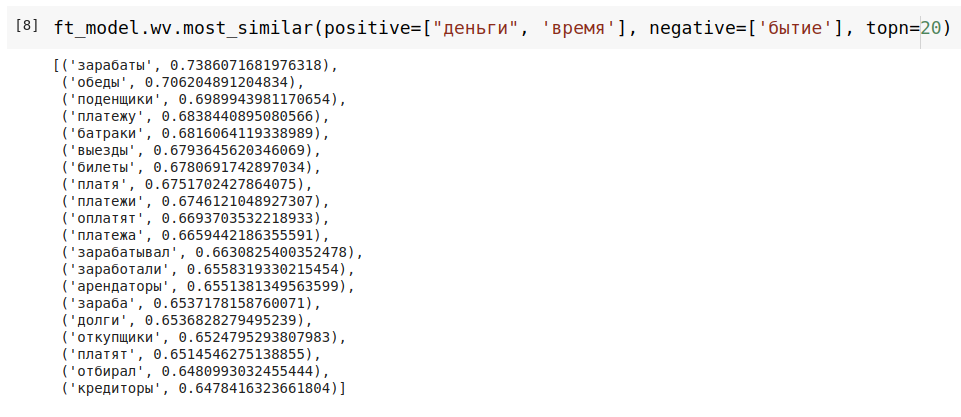

Как видим, кроме плохо лемматизированных слов есть упоминания о денежных транзакциях (платежи), платежных документах (билеты) и сторонах (кредиторы) денежных отношений. Попробуем уточнить наш запрос, добавив философию в качестве позитивного примера для поиска.

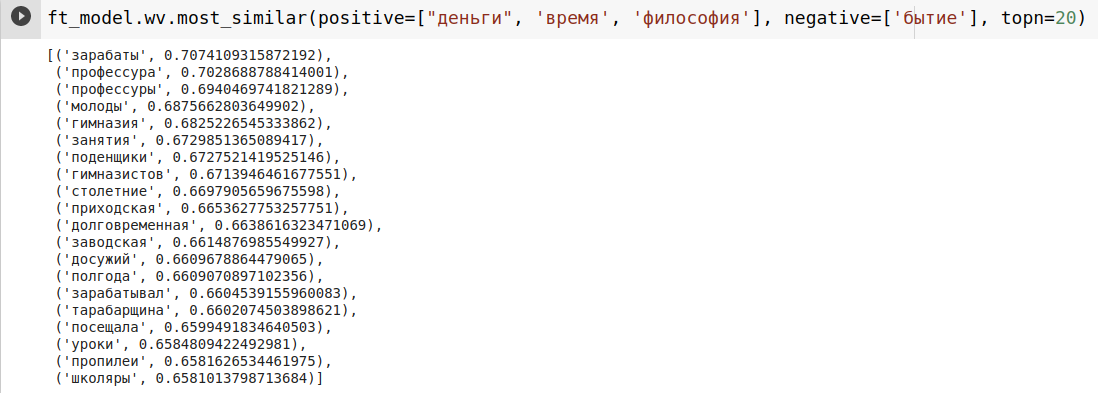

Появляются источники и адресаты денег в философии (профессура, школяры). Ну что же, набор участников временно-денежных отношений у нас есть, самое время заэмбеддить их всех.

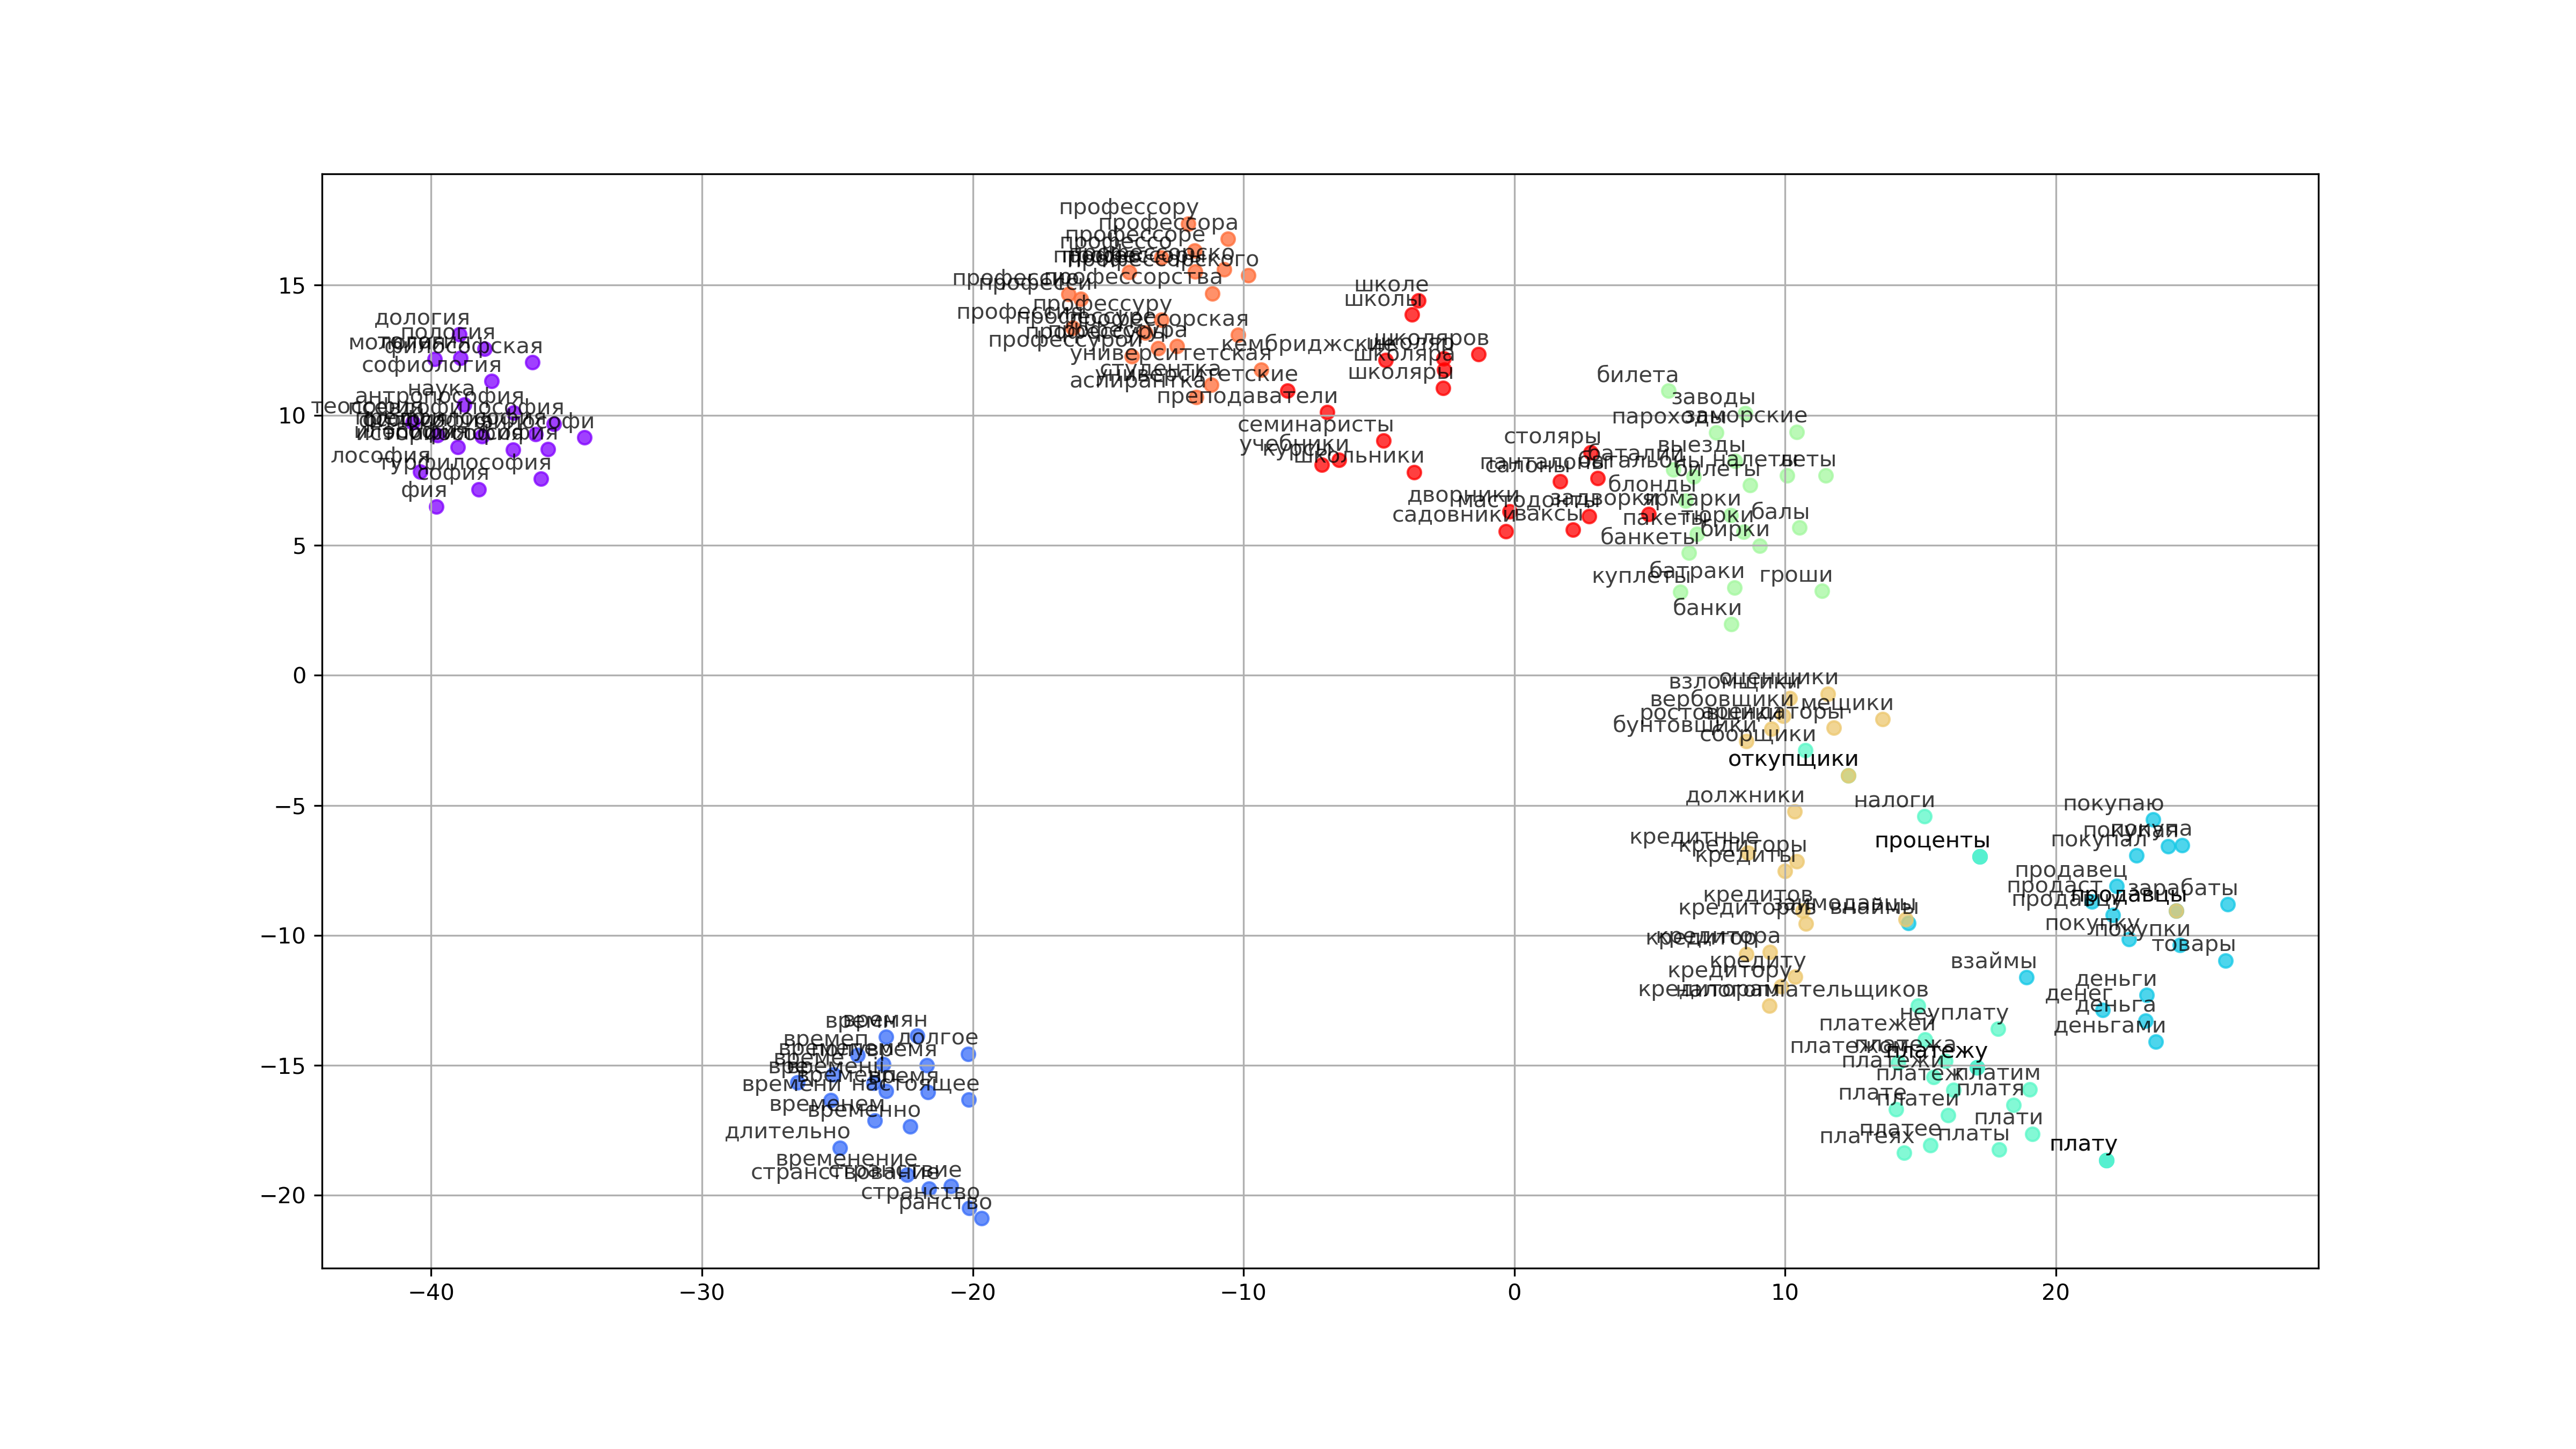

Мы вытащили из философии довольно-таки связный и обширный кластер денежных отношений и их участников. В основном это профессиональные сообщества, которые получают деньги за потраченное на работу время. Время и философия, конечно, на картинке держатся особняком. Ну что же, в конце-концов мы обучали модель на философских текстах, а не на учебниках по экономике. Но некоторую рациональную часть знания о мире мы таки извлекли.